# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [7]:
raw_data = pd.read_csv("Countries-exercise.csv")
data = raw_data.copy()
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


Remove the duplicate index column from the dataset. 

In [8]:
# no col

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

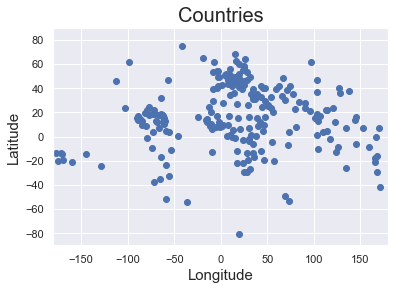

In [9]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.title("Countries", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [10]:
x = data.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Use 4 clusters initially.

In [11]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

### Clustering results

In [12]:
clusters = kmeans.fit_predict(x)

In [14]:
data_wc = data.copy()
data_wc['Cluster'] = clusters
data_wc

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

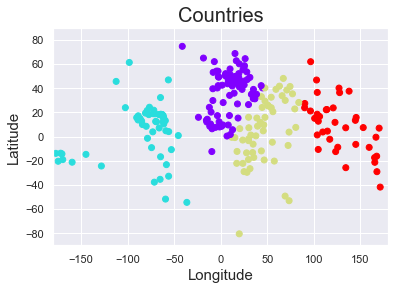

In [15]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_wc['Cluster'], cmap='rainbow')
plt.title("Countries", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [16]:
kmeans.inertia_

256590.58575406106

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [19]:
wcss = []

for i in range(1, 11):
    km = KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\sabin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934304,
 192212.48189497035,
 152164.15221066383,
 127716.94111629606,
 102891.39703473674,
 84967.4172006829,
 76555.50290517969]

### The Elbow Method

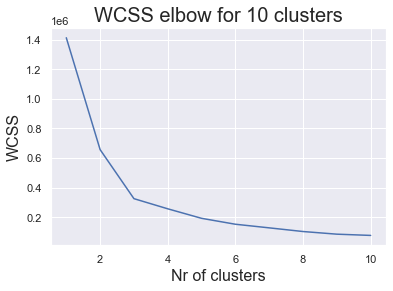

In [23]:
nr_clusters = range(1,11)
plt.plot(nr_clusters, wcss)
plt.title("WCSS elbow for 10 clusters", fontsize=20)
plt.xlabel("Nr of clusters", fontsize=16)
plt.ylabel("WCSS", fontsize=16)
plt.show()

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

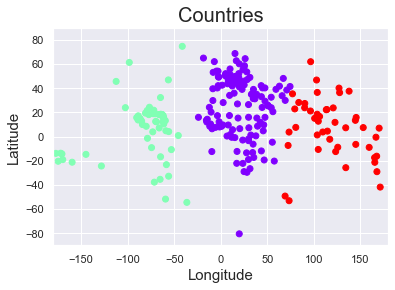

In [24]:
# 3 clusters:
kmeans = KMeans(3)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)
data_wc = data.copy()
data_wc['Cluster'] = clusters
plt.scatter(data['Longitude'], data['Latitude'], c=data_wc['Cluster'], cmap='rainbow')
plt.title("Countries", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

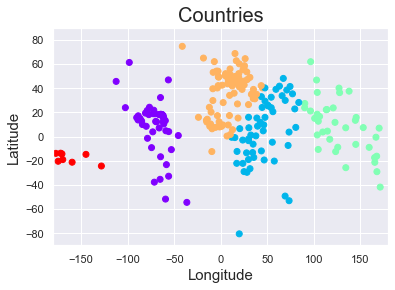

In [25]:
# 3 clusters:
kmeans = KMeans(5)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)
data_wc = data.copy()
data_wc['Cluster'] = clusters
plt.scatter(data['Longitude'], data['Latitude'], c=data_wc['Cluster'], cmap='rainbow')
plt.title("Countries", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()